<a href="https://colab.research.google.com/github/Ismailov-Gadzhimurad/my_project/blob/main/%D0%98%D1%81%D0%BC%D0%B0%D0%B8%D0%BB%D0%BE%D0%B2_%D0%93%D0%B0%D0%B4%D0%B6%D0%B8%D0%BC%D1%83%D1%80%D0%B0%D0%B4_%D0%91%D0%B0%D0%BA%D0%B8%D1%80%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<ipython-input-20-65c31e067b21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  number_of_clients = sns.catplot(data=df, x='название банка', kind='count', saturation=1.5, palette='mako')


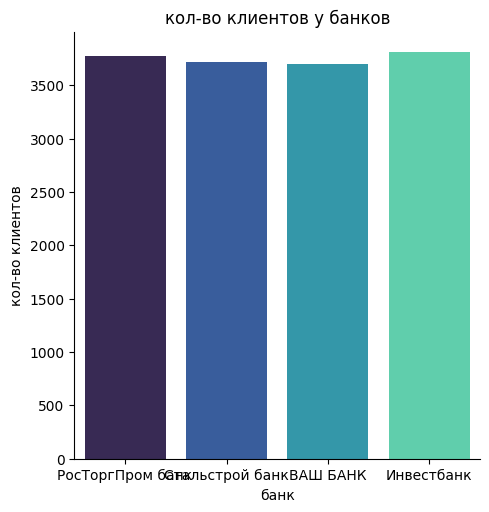

In [ ]:
df = pd.read_csv('Кредиты (1).csv')
number_of_clients = sns.catplot(data=df, x='название банка', kind='count', saturation=1.5, palette='mako')
number_of_clients.set(xlabel='банк', ylabel='кол-во клиентов', title='кол-во клиентов у банков')


In [ ]:
df['Имя покупателя'].nunique()

298

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'сумма займа'}>],
       [<Axes: title={'center': 'процент годовых'}>, <Axes: >]],
      dtype=object)

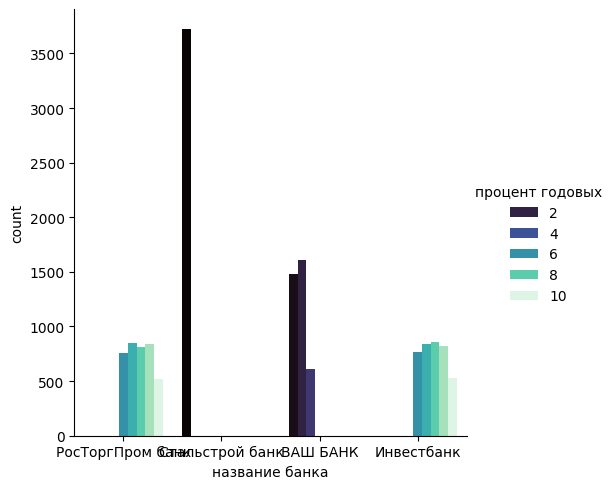

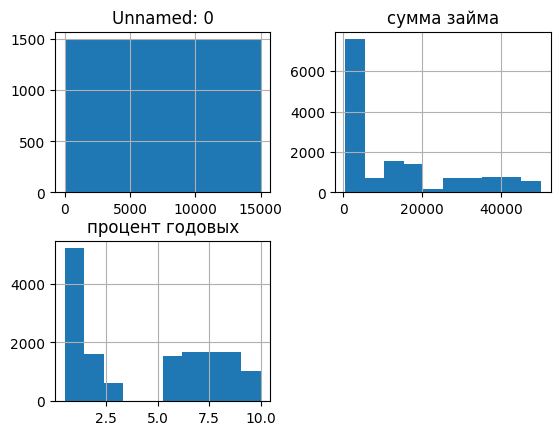

In [ ]:
sns.catplot(data=df, hue='процент годовых', x='название банка',
            kind='count', saturation=1.5, palette='mako')
df.hist()

In [ ]:
df.loc[:, 'название банка'] = df['название банка'].apply(lambda x: 1 if x == 'ВАШ БАНК' else 0)


<ipython-input-23-e4e770243a0e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'название банка'] = df['название банка'].apply(lambda x: 1 if x == 'ВАШ БАНК' else 0)


In [ ]:
new_df = df['Дата выдачи'].str.split('-', expand=True)
new_df.columns = ['год', 'месяц', 'день']
df = pd.concat([df, new_df], axis=1)
df = df.drop(['Unnamed: 0', 'Дата выдачи'], axis=1)

In [ ]:
df['год'] = df['год'].astype('int').tolist()
df['месяц'] = df['месяц'].astype('int').tolist()
df['день'] = df['день'].astype('int').tolist()

In [ ]:
value_arr = np.array(df['сумма займа'])
nor_arr = preprocessing.normalize([value_arr]).flatten()
df['сумма займа'] = nor_arr.tolist()

(array([7580.,  726., 1567., 1406.,  154.,  731.,  736.,  740.,  774.,
         586.]),
 array([0.00020223, 0.00220429, 0.00420635, 0.00620841, 0.00821047,
        0.01021253, 0.01221459, 0.01421664, 0.0162187 , 0.01822076,
        0.02022282]),
 <BarContainer object of 10 artists>)

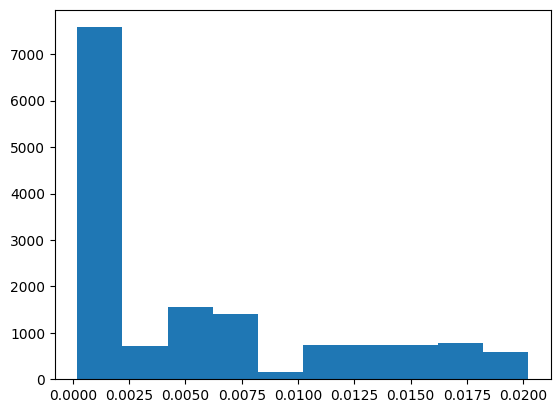

In [ ]:
plt.hist(df['сумма займа'])


In [ ]:
names = df['Имя покупателя'].unique()
le = LabelEncoder()
le.fit(names)
df['Имя покупателя'] = le.transform(df['Имя покупателя'])

In [ ]:
df.head()

,Имя покупателя,сумма займа,процент годовых,название банка,год,месяц,день
0,82,0.000890,8.0,0,2019,10,25
1,89,0.017796,0.5,0,2022,12,20
2,202,0.006714,1.0,1,2018,4,20
3,116,0.007968,1.0,1,2022,8,18
4,296,0.013347,0.5,0,2018,7,23


In [ ]:
X = df[['Имя покупателя', 'сумма займа', 'процент годовых', 'год', 'месяц', 'день']]
Y = df['название банка']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X = sm.add_constant(X, prepend=False)
print(X)

       Имя покупателя  сумма займа  процент годовых   год  месяц  день  const
0                  82     0.000890              8.0  2019     10    25    1.0
1                  89     0.017796              0.5  2022     12    20    1.0
2                 202     0.006714              1.0  2018      4    20    1.0
3                 116     0.007968              1.0  2022      8    18    1.0
4                 296     0.013347              0.5  2018      7    23    1.0
...               ...          ...              ...   ...    ...   ...    ...
14995             153     0.010111              0.5  2020      6    28    1.0
14996             293     0.004530              2.0  2018      2    10    1.0
14997              45     0.015774              0.5  2022      6     6    1.0
14998              79     0.000809              9.0  2018      1     1    1.0
14999              38     0.001496              7.0  2020      2     9    1.0

[15000 rows x 7 columns]


In [ ]:
model = OLS(Y_train, X_train)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:         название банка   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              6419.
Date:                Tue, 23 Jan 2024   Prob (F-statistic):                        0.00
Time:                        15:42:26   Log-Likelihood:                         -41.198
No. Observations:               12000   AIC:                                      94.40
Df Residuals:                   11994   BIC:                                      138.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
print(res.params)

Имя покупателя      0.000011
сумма займа       -94.333847
процент годовых    -0.185835
год                 0.000800
месяц               0.001091
день               -0.000160
dtype: float64


In [ ]:
y_train_predict = res.predict(X_train)
y_test_predict = res.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(Y_train, y_train_predict),
        mean_squared_error(Y_test, y_test_predict)))

print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(Y_train, y_train_predict),
        r2_score(Y_test, y_test_predict)))


MSE train: 0.059, test: 0.057
R^2 train: 0.684, test: 0.689
